<a href="https://colab.research.google.com/github/ckalibsnelson/HackCville---Node-A/blob/master/06_Linear_and_Logistic_Regression_with_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
!pip install seaborn==0.9.0 # you have to restart runtime to actually get to version 0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [0]:
sns.__version__

'0.9.0'

# Linear Regression

with the iris dataset

![alt text](https://www.gardendesign.com/pictures/images/900x705Max/site_3/iris-cristata-dwarf-crested-iris-purple-flower-shutterstock-com_12594.jpg)

### Examining our data

In [0]:
iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv', header=0)

In [0]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

A good thing to do first is see the correlation between variables so we know where to start

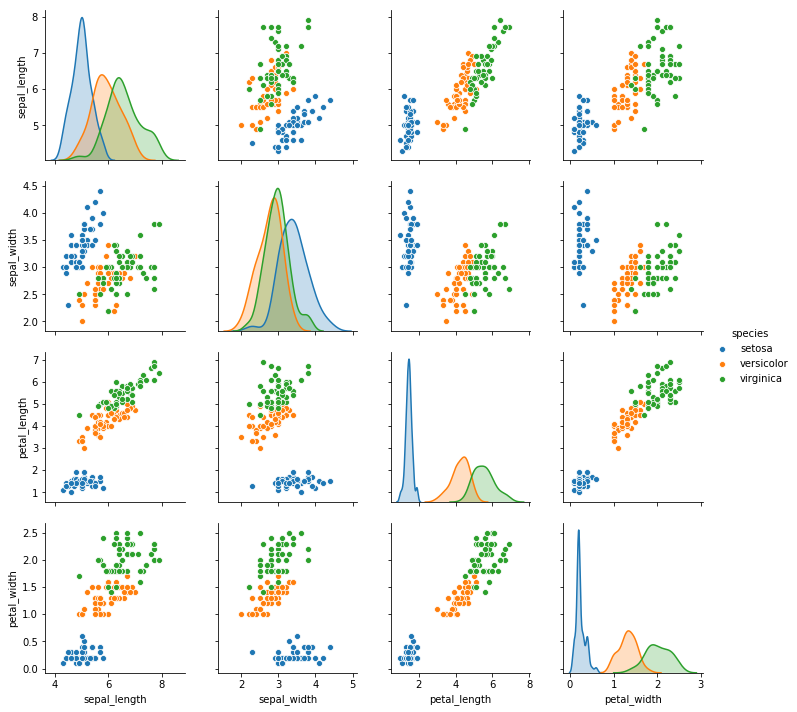

In [0]:
sns.pairplot(iris, hue='species')

In [0]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


The diagonal are all 1s because the same column is 100% the same as itself.

## Predicting Petal length from petal width

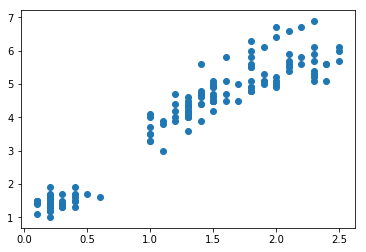

In [0]:
plt.scatter(iris['petal_width'], iris['petal_length'])
plt.show()

In [0]:
X_data = iris[['petal_width']] # must be a dataframe for linear regression
Y_data = iris['petal_length']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1) # how to split the data using an sklearn function

In [0]:
x_train

In [0]:
y_train.head()

133    5.1
108    5.8
6      1.4
60     3.5
59     3.9
Name: petal_length, dtype: float64

In [0]:
x_test

In [0]:
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(lin.coef_)
print(lin.intercept_)

[2.25129944]
1.0613638380243882


In [0]:
lin.predict(x_train)

array([4.438313  , 5.11370283, 1.73675367, 3.31266328, 4.21318305,
       1.51162373, 4.438313  , 4.21318305, 1.73675367, 4.66344294,
       3.98805311, 6.23935255, 5.33883277, 5.11370283, 5.78909266,
       1.96188361, 1.73675367, 1.28649378, 1.51162373, 6.46448249,
       4.438313  , 3.98805311, 1.96188361, 4.21318305, 1.51162373,
       4.438313  , 5.78909266, 6.23935255, 1.96188361, 3.98805311,
       5.78909266, 3.98805311, 1.51162373, 2.18701356, 5.33883277,
       5.56396271, 3.31266328, 1.51162373, 3.98805311, 1.51162373,
       4.88857288, 5.56396271, 1.96188361, 3.31266328, 1.51162373,
       6.0142226 , 1.96188361, 1.28649378, 5.11370283, 1.51162373,
       5.11370283, 6.23935255, 3.53779322, 1.28649378, 4.438313  ,
       5.11370283, 6.0142226 , 4.21318305, 4.88857288, 1.51162373,
       4.438313  , 6.23935255, 5.33883277, 3.31266328, 1.51162373,
       1.73675367, 1.51162373, 5.11370283, 1.51162373, 5.11370283,
       3.98805311, 4.438313  , 4.21318305, 5.78909266, 3.76292

In [0]:
print(r2_score(lin.predict(x_train), y_train))

# the default .score() method of a regression model is r2_score
# so here is another way to see the r^2 score
print(lin.score(x_train, y_train))

0.9199584701067601
0.9258903221053437


We check the r^2 score of our fitted data, and it's pretty good, greater than 0.9.

In [0]:
y_predict = lin.predict(x_test)

In [0]:
y_predict

array([4.66344294, 1.51162373, 3.98805311, 5.11370283, 3.31266328,
       3.76292316, 4.438313  , 1.51162373, 1.51162373, 6.68961243,
       1.51162373, 1.51162373, 5.78909266, 3.98805311, 3.53779322,
       6.23935255, 5.33883277, 6.68961243, 1.28649378, 3.98805311,
       4.438313  , 4.21318305, 4.21318305, 3.76292316, 1.96188361,
       4.438313  , 3.98805311, 3.76292316, 1.28649378, 5.33883277])

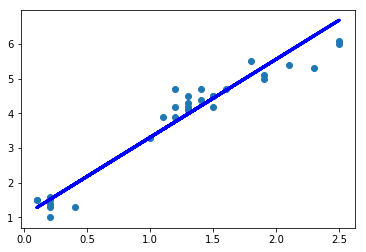

In [0]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, color='blue', linewidth=3)
plt.show()

## Predicting Sepal Length from Sepal Width

An example of when linear regression doesn't work

In [0]:
X_data = iris[['sepal_width']]
Y_data = iris['sepal_length']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2) 

In [0]:
lin = LinearRegression()
lin.fit(x_train, y_train)
print(lin.coef_)
print(lin.intercept_)
print(r2_score(lin.predict(x_train), y_train))

[-0.09454494]
6.175210570944037
-392.2794801155593


Really bad r^2 score on this one (don't really know how it gets that negative)

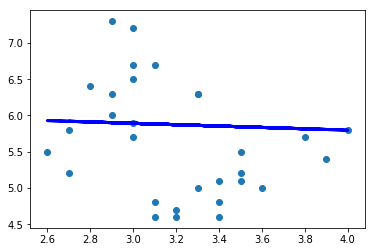

In [0]:
plt.scatter(x_test, y_test)
plt.plot(x_test, lin.predict(x_test), color='blue', linewidth=3)
plt.show()

## Exercise

Sepal length vs. width is not a good fit. What if you try relating sepal width to sepal length split by species?

In [0]:
versicolor = iris[iris['species'] == 'setosa']
X_data = versicolor[['sepal_width']]
Y_data = versicolor['sepal_length']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2) 

In [0]:
lin = LinearRegression()
lin.fit(x_train, y_train)
print(lin.coef_)
print(lin.intercept_)
print(r2_score(lin.predict(x_train), y_train))

[0.68072289]
2.657831325301205
0.19085691503265334


Low r^2 score probably because of the small number of instances in our training and test sets

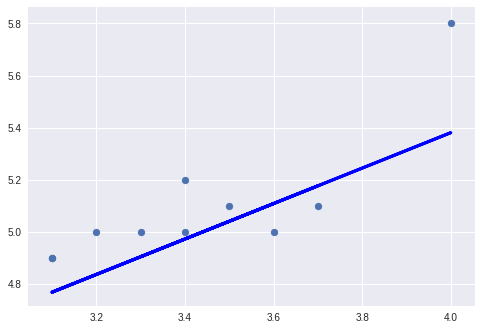

In [0]:
plt.scatter(x_test, y_test)
plt.plot(x_test, lin.predict(x_test), color='blue', linewidth=3)
plt.show()

# Multiple Linear Regression

Now let's see if we can get a more accurate prediction of petal length using multiple independent variables. 

From the seaborn pairplot, we can see that `sepal_length` seems to also have a linear relationship with the `petal_length`, so it will likely boost the strength of our model.

So let's try a linear regression with `petal_length = a*sepal_length + b*petal_width + c`

In [0]:
X_data = iris[['petal_width', 'sepal_length']]
Y_data = iris['petal_length']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2) 
lin = LinearRegression()
lin.fit(x_train, y_train)
print(lin.coef_)
print(lin.intercept_)
print(r2_score(lin.predict(x_train), y_train))

[1.77358647 0.52152745]
-1.4225468508681947
0.9434124148927013


Our r^2 score got a little better! Every bit matters

# Logistic Regression

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

In [0]:
X_data = iris[['petal_width']]
Y_data = iris[['species']]
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data)

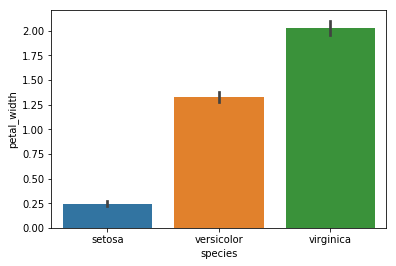

In [0]:
sns.barplot(x='species', y='petal_width', data=iris)

In [0]:
log = LogisticRegression()
log.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_predict = log.predict(x_test)
y_predict

array(['virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa'], dtype=object)

In [0]:
# Probabilities are in the order [setosa, versicolor, virginica]
y_proba = log.predict_proba(x_test)
y_proba

array([[0.00869537, 0.31175833, 0.6795463 ],
       [0.09268926, 0.39695408, 0.51035665],
       [0.68074685, 0.26250105, 0.0567521 ],
       [0.01922528, 0.33522399, 0.64555073],
       [0.32526748, 0.39747657, 0.27725595],
       [0.06329317, 0.38203324, 0.55467359],
       [0.32526748, 0.39747657, 0.27725595],
       [0.72884448, 0.23757577, 0.03357975],
       [0.74478094, 0.22912092, 0.02609814],
       [0.00272756, 0.29063143, 0.70664101],
       [0.70801298, 0.24849287, 0.04349415],
       [0.72884448, 0.23757577, 0.03357975],
       [0.68074685, 0.26250105, 0.0567521 ],
       [0.00128521, 0.28368953, 0.71502526],
       [0.01922528, 0.33522399, 0.64555073],
       [0.1862297 , 0.41324147, 0.40052883],
       [0.72884448, 0.23757577, 0.03357975],
       [0.01922528, 0.33522399, 0.64555073],
       [0.72884448, 0.23757577, 0.03357975],
       [0.06329317, 0.38203324, 0.55467359],
       [0.32526748, 0.39747657, 0.27725595],
       [0.00869537, 0.31175833, 0.6795463 ],
       [0.

In [0]:
print(accuracy_score(y_predict, y_test)) # instead of r2_score, categorical variables use the accuracy_score to check accuracy
log.score(x_test, y_test)

0.7631578947368421


0.7631578947368421

In [0]:
y_predict = pd.DataFrame(y_predict)
pd.concat([y_test.reset_index(), y_predict], axis=1).set_index('index') # to show where the differences are

,species,0
index,,
113,virginica,virginica
76,versicolor,virginica
16,setosa,setosa
103,virginica,virginica
93,versicolor,versicolor
72,versicolor,virginica
79,versicolor,versicolor
27,setosa,setosa
34,setosa,setosa


Similar to Linear Regression, can we do better if we use more than 1 independent variable? Again, we also want to use two non-related independent variables for the best prediction of the dependent variable.

In [0]:
X_data = iris[['petal_width', 'petal_length']]
Y_data = iris[['species']]
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data)
log = LogisticRegression()
log.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
accuracy_score(log.predict(x_test), y_test)

0.8947368421052632

In [0]:
# Useful method called crosstab that displays the actual vs. predicted value counts
pd.crosstab(y_test['species'], log.predict(x_test), rownames=['Actual'], colnames=['Predicted:'])

Predicted:,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,8,2
virginica,0,2,12


Sometimes, adding more features won't increase the performance of the model. This shows the importance of carefully analyzing the data (or guessing and checking) and choosing the features!